<a href="https://colab.research.google.com/github/NohemiVargas/Procesamiento_y_clasificacion_datos/blob/main/practica2/Practices2_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2b. Laura Nohemí Vargas de la Rosa


# Clustering o agrupamiento

La idea principal de aplicar el clustering es para poder organizar los puntos que se dibujan en un plan en diferentes categorias o grupos. 

## K medias

El algortimo de kmedias es uno de los mas simples y famosos ejemplos que podemos escuchar de los algoritmos de clustering. Estos son los pasos que se realizan para llevarlo a cabo:

- Se selecciona el numero de clusters k que pienses que es numero optimo.
- Se inicializan los k puntos como centroides de manera aleatoria dentro del espacio en donde estan distribuidos nuestros datos.
- Relacionamos cada observacion son el centroide mas cercano.
- Los centroides se actualizan al centro de todos los datos que se le atribuyeron en el paso anterior.
- Estos ultimos dos pasos se repetiran hasta que todos los centroides esten estables.





A continuacion utilizaremos las herramientas que vimos en la clase asada para generar datos dummy y ejemplificar el uso del clustering.

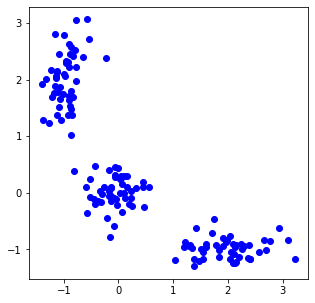

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

In [2]:
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids 
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)
    
    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    
    cent_history.append(centroids)

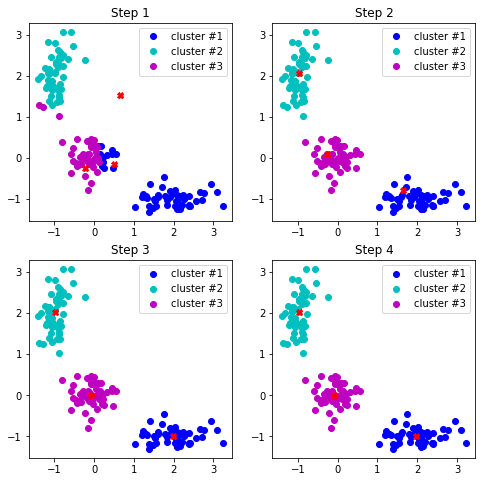

In [3]:
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1));

Como vemos comunmente, en este ejemplo utilizamos la medida de distancia euclidiana (el algoritmo va a converger con cualquier otra metrica). Algunas de las caracteristicas que puedes tomar en cuenta para poder mejorar o cambiar tus resultados es el criterio de convergencia o la medida de distancia que utilizas entre los puntos de los datos y los centroides.

### ¿Como podemos eleguir el criterio de numero de clusters?

Haciendo contraste con herramientas de aprendizaje supervisado, en donde tenemos problemas de clasificacion o regresion, el agrupamiento requiere mas esfuerzo para elegir el criterio de optimizacion. Usualmente, cuando se trabaja con kmedias, debemos de optimizar la suma de las distancias cuadradas entre las observaciones o puntos y sus centroides. Para esto tenemos la siguiente formula:

\begin{align}
        J(C) = \sum_{k=1}^K \sum_{i \in C_k}|| x_i - \mu_k || \rightarrow \min_C
\end{align}

En donde interpretamos a C como el conjunto de clusters a la potencia k. $\mu_k$ es el centroide de un cluster $C_k$.

Esta definicion pareceria estar correcta, sin embargo, sin restriccion, el optimo se alcanza cuando el numero de centroides sea igual al numero de observaciones, por lo que cada uno de los puntos terminaria con su propio cluster. Para evitar sto, tenemos la funcion:

\begin{align}
        D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1} - J(C_k))|} \rightarrow \min_k
\end{align}

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

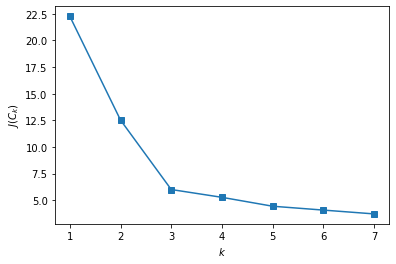

In [6]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

Con esta funcion vemos que $J(C_k)$ llega hasta el punto 3, en donde a partir de ahi no tiene cambios grandes, por lo que podemos inferir que ese es el valor optimo de clusters.

Este tipo de problema es np-dificil, ya que su complejidad va en aumento dependiento de las dimensiones, los clusters y el numero de observaciones. La implementacion de este tipo de problema con sklearn tiene la ventaja de su funcion de inicializacion default nos ayuda a identificar centroides robustos. (Existen elementos de programacion en paralelo que tambien pueden implementarse en esta libreria que mejora el tiempo y capacidad computacional del problema).

Existe otra version del algoritmo llamado agrupacion aglomerativa. Esta se encuentra en una libreria llamada scipy. No entraremos a detalle, pero es una opcion que pueden explorar por su cuenta.

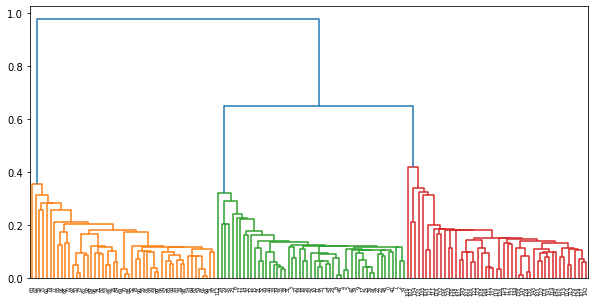

In [7]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X) 
# linkage — is an implementation if agglomerative algorithm
Z = hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

# Practica:

Utilizando la libreria de sklearn y la base de datos de iris, realiza el proceso de kmeans.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
from sklearn.cluster import KMeans as km
from sklearn.metrics import silhouette_score

In [41]:
iris=pd.read_csv('/content/drive/MyDrive/Colaboratory/Procesamiento y clasificación de Datos/Práctica 2/Iris.csv')

In [42]:
iris2 = iris.drop('Id', axis=1)
iris2 = iris2.drop('Species', axis=1)
iris2.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
distortions = []
K = [2,3,4,5,6,7,8,9,10]
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=20, max_iter=50)
    kmeanModel.fit(iris2)
    distortions.append(kmeanModel.inertia_)

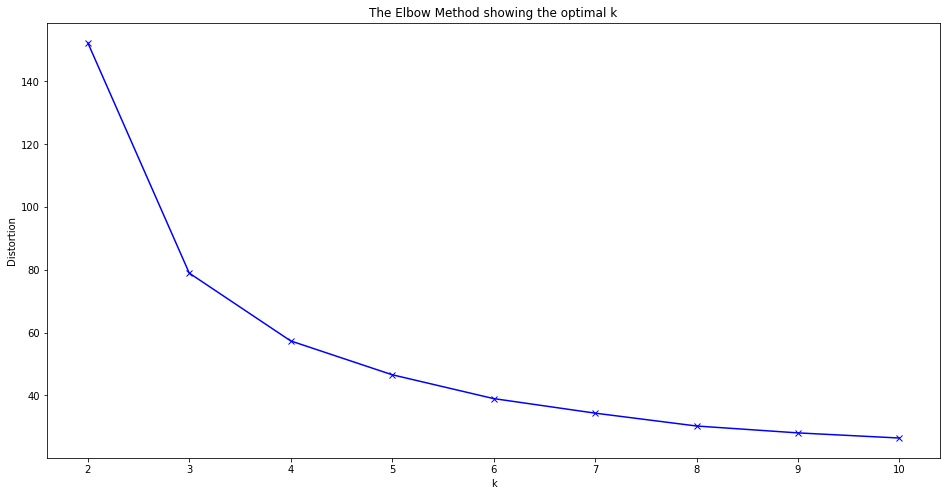

In [44]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow method indicates that the best number of clusters could be 3 or 4

The silhouette score is usefull to know the number of clusters and their quality. It can complement the elbow method.

silhouette score=(𝑝−𝑞)/𝑚𝑎𝑥(𝑝,𝑞)

*   p is the mean distance to the points in the nearest cluster that the data point is not a part of 
*   q is the mean intra-cluster distance to all the points in its own cluster.
*   The value of the silhouette score range lies between -1 to 1.
*   A score closer to 1 indicates that the data point is very similar to other data points in the cluster
*   A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


In [46]:
K = [2,3,4,5,6,7,8,9,10]
for k in K:
    kmeanModel = KMeans(n_clusters=k,n_init=20, max_iter=50)
    kmeanModel.fit(iris2)
    cluster_labels = kmeanModel.labels_
    silhouette_avg=silhouette_score(iris2, cluster_labels)
    print("For cluster={0}, the silhouette score is {1}".format(k,silhouette_avg))

For cluster=2, the silhouette score is 0.6808136202936816
For cluster=3, the silhouette score is 0.5525919445499757
For cluster=4, the silhouette score is 0.4978256901095472
For cluster=5, the silhouette score is 0.4885175508886279
For cluster=6, the silhouette score is 0.36820569682713084
For cluster=7, the silhouette score is 0.3580015953102926
For cluster=8, the silhouette score is 0.3553027216757647
For cluster=9, the silhouette score is 0.3226386342293721
For cluster=10, the silhouette score is 0.31189029562370896


We will be exploring 3 clusters, as the elbow method suggest, it has a good silhouette score and because we know that we have 3 different species.

In [47]:
kmeanModel = KMeans(n_clusters=3, max_iter=50)
kmeanModel.fit(iris2)

KMeans(max_iter=50, n_clusters=3)

In [48]:
iris3=iris;
iris3['cluster']=kmeanModel.labels_
iris3.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [49]:
df2 = iris3.groupby(['Species','cluster'])['Id'].count()
print(df2)

Species          cluster
Iris-setosa      0          50
Iris-versicolor  1          48
                 2           2
Iris-virginica   1          14
                 2          36
Name: Id, dtype: int64


* Se puede observar que todas las Iris Setosa fueron ubicadas en el mismo cluster. 
* Para iris versicolor, la mayoría fueron ubicadas en el mismo cluster, solo 4% (2 observaciones) se ubicaron en un cluster diferente.
* Iris Virginica fue la que mayor error tuvo (28% categorizadas en el mismo cluster de versicolor). Esto porque versicolor y virginica tienen un sépalos de anchos similares.

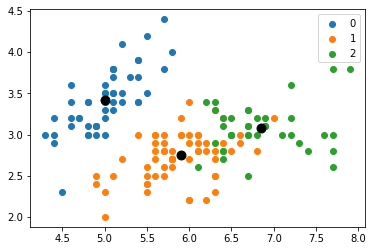

In [50]:
#Getting the Centroids
label = kmeanModel.fit_predict(iris2)
centroids = kmeanModel.cluster_centers_
u_labels = np.unique(label)
X= iris2.values
#X= rfm[['Recency','Frequency','Monetary']].values
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] ,label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()